In [1]:
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd

from utils import format_tweet_data_frame, plot_sentiment_distribution

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [2]:
unzipped_tweet_file_names = ['2017_Arabic_train_final.zip', '2017_English_final.zip']

In [3]:
def unzip_tweet_files(tweet_file_names):
    root_file_path = "data/raw"
    for file_name in tweet_file_names:
        local_zip = f"{root_file_path}/{file_name}"
        print(f"extracting files in {local_zip}")        
        zip_ref = zipfile.ZipFile(local_zip, 'r')
        zip_ref.extractall(root_file_path)
        zip_ref.close()

In [8]:
# unzip_tweet_files(unzipped_tweet_file_names)

extracting files in data/raw/2017_Arabic_train_final.zip
extracting files in data/raw/2017_English_final.zip


In [4]:
en_tweets_root_path = "data/raw/2017_English_final/GOLD/Subtask_A"
ar_tweets_root_path = "data/raw/2017_Arabic_train_final/GOLD"

en_train_tweets_files = ["twitter-2013train-A.txt", "twitter-2013dev-A.txt", 
                         "twitter-2014sarcasm-A.txt", "twitter-2015train-A.txt", 
                         "twitter-2016train-A.txt", "twitter-2016dev-A.txt", "twitter-2016devtest-A.txt"]

en_test_tweets_files = ["twitter-2013test-A.txt", "twitter-2014test-A.txt", "twitter-2015test-A.txt", 
                        "twitter-2016test-A.txt"]

ar_test_tweets_files = ["SemEval2017-task4-train.subtask-A.arabic.txt"]

positive    9245
neutral     9013
negative    3452
Name: 1, dtype: int64


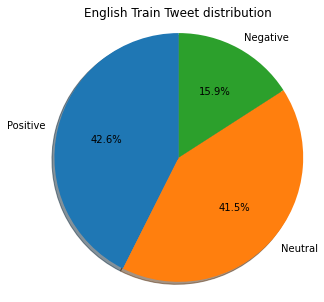

In [5]:
en_train_tweet_df = format_tweet_data_frame(en_tweets_root_path, en_train_tweets_files)
values = en_train_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "English Train Tweet distribution")

In [6]:
en_train_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']
en_train_tweet_df = en_train_tweet_df.drop_duplicates(subset=['id'])
en_train_tweet_df.head()

,id,sentiment,original,preprocessed
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas house hit $ 3.39 i\u2019 m going chapel hi...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott shit\u002c watch rafa johnny deal...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,i\u2019 m gsp fan\u002c hate nick diaz can\u20...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general says israel\u2019s iron dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran\u002c mon amour obama tried establish t...


neutral     13511
positive    10554
negative     4357
Name: 1, dtype: int64


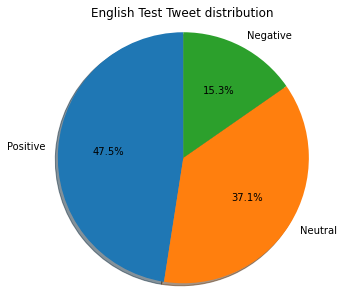

In [7]:
en_test_tweet_df = format_tweet_data_frame(en_tweets_root_path, en_test_tweets_files)
values = en_test_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "English Test Tweet distribution")

In [9]:
# en_test_tweet_df = en_test_tweet_df.drop(columns=[3]) # there is a weird extra column in the test set, dropped that
en_test_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']
en_test_tweet_df = en_test_tweet_df.drop_duplicates(subset=['id'])
en_test_tweet_df.head()

,id,sentiment,original,preprocessed
0,264238274963451904,positive,"@jjuueellzz down in the Atlantic city, ventnor...",atlantic city ventnor margate ocean city area ...
1,218775148495515649,positive,Musical awareness: Great Big Beautiful Tomorro...,musical awareness great big beautiful tomorrow...
2,258965201766998017,neutral,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,radio786 100.4fm 7:10 fri oct 19 labour analys...
3,262926411352903682,negative,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",kapan sih lo ngebuktiin jan ngomong doang susa...
4,171874368908050432,neutral,"Excuse the connectivity of this live stream, f...",excuse connectivity live stream baba amr activ...


In [10]:
print(len(en_train_tweet_df))
print(len(en_test_tweet_df))

21124
28333


neutral     1470
negative    1141
positive     742
Name: 1, dtype: int64


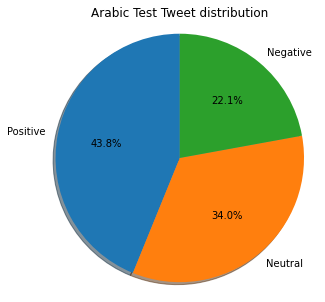

In [11]:
ar_test_tweet_df = format_tweet_data_frame(ar_tweets_root_path, ar_test_tweets_files)
values = ar_test_tweet_df[1].value_counts()
print(values)
num_positive_tweets = values.iloc[0]
num_neutral_tweets = values.iloc[1]
num_negative_tweets = values.iloc[2]
plot_sentiment_distribution(num_positive_tweets, num_neutral_tweets, num_negative_tweets, "Arabic Test Tweet distribution")

In [12]:
ar_test_tweet_df.columns = ['id', 'sentiment', 'original', 'preprocessed']
ar_test_tweet_df.drop_duplicates(subset=['id'])
ar_test_tweet_df.head()

,id,sentiment,original,preprocessed
0,783555835494592513,positive,إجبار أبل على التعاون على فك شفرة اجهزتها http...,إجبار أبل على التعاون على فك شفرة اجهزتها
1,783582397166125056,positive,RT @20fourMedia: #غوغل تتحدى أبل وأمازون بأجهز...,غوغل تتحدى أبل وأمازون بأجهزة جديدة
2,783592390728769536,positive,جوجل تنافس أبل وسامسونج بهاتف جديد https://t.c...,جوجل تنافس أبل وسامسونج بهاتف جديد
3,783597390070685696,positive,رئيس شركة أبل: الواقع المعزز سيصبح أهم من الطع...,رئيس شركة أبل الواقع المعزز سيصبح أهم من الطعام
4,783617442031472640,neutral,ساعة أبل في الأسواق مرة أخرى https://t.co/dY2x...,ساعة أبل في الأسواق مرة أخرى


In [13]:
ar_test_tweet_df.to_csv('data/preprocessed/arabic/arabic_test_tweets.csv', index=False)
en_train_tweet_df.to_csv('data/preprocessed/english/english_train_tweets.csv', index=False)
en_test_tweet_df.to_csv('data/preprocessed/english/english_test_tweets.csv', index=False)